# Wellbeing and lifestyle data

## 1. Description and objetives

This dataset from Kaggle.com (https://www.kaggle.com/ydalat/lifestyle-and-wellbeing-data) contains 12,757 survey responses with 23 attributes describing how we live our lives.
How can we reinvent our lifestyles to optimize our individual wellbeing while supporting the UN Sustainable Development Goals?

Your Work-Life Balance survey evaluates how we thrive in both your professional and personal lives: it reflects how well you shape your lifestyle, habits and behaviors to maximize your overall life satisfaction along the following five dimensions:
1. Healthy body, reflecting your fitness and healthy habits;
2. Healthy mind, indicating how well you embrace positive emotions;
3. Expertise, measuring the ability to grow your expertise and achieve something unique;
4. Connection, assessing the strength of your social network and your inclination to discover the world;
5. Meaning, evaluating your compassion, generosity and how much 'you are living the life of your dream'.  

### Description

This is a description of the attributes in the dataset:

In [1]:
%run wellbeing_description.py

,Variable,Description,Values,Type of attribute
0,Timestamp,Date of the survey,7/7/15 - 24/2/2020,"Ordinal, object"
1,Fruits_Veggies,How many fruits or veggies do you eat everyday?,0 - 5,"Numerical, int 64"
2,Daily_stress,"How much stress so you typically experience everyday? In average, over 12 months",0 - 5,"Numerical, object"
3,Places_visited,"How many places do you visit? Over a period of 12 months. Include new states, new cities, etc.",0 - 10,"Numerical, int 64"
4,Core_circle,How many people are very close to you? i.e. close family and friends,0 - 10,"Numerical, int 64"
5,Supporting others,How many people do you help achieve a better life? A reflection of your altruism. Over a period of 12 months.,0 - 10,"Numerical, int 64"
6,Social_network,"How many people do you interact with during a typical day? At home, at work... Average of workdays and weekends",0 - 10,"Numerical, int 64"
7,Achievement,"How many remarkable achievements are you proud of? Over the last 12 months, such as running a marathon, success at work, opening a new business, etc.",0 - 10,"Numerical, int 64"
8,Donation,How many times do you donate your time or money to good causes? Over a period of 12 months,0 - 5,"Numerical, int 64"
9,BMI_Range,What is your body mass index range? Your body mass in kg divided by the square of your height in meters.,1 - 2,"Numerical, int 64"


### Objetives

We are looking for findings that might help us to get success and improve our quality of life. In particular, we'll try to answer these questions:

1. Achievements: What indicators have the greatest influence in our achievements and how well can we predict them?  


2. Stress levels: What indicators have the greatest influence in our stress levels and how well can we predict it?

From the conclusion we reach to, we can modify some habits to maximize our achievements an reduce our stress levels


## 2. Exploratory Data Analysis  

This is the general guide line followed for the EDA in the project:


**2.1 Data Exploration:** Exploration of the values and data types.    

**2.2 Data cleaning:** Clean the data, handling possible wrong values, NaN and outliers, and changing the data types to numeric (integers) when possible to perform numerical data analysis.  

**2.3 Feature engineering:** Create encoding from categorical variables, such as ordinal encoding for age, binary encoding and dummy variables for gender

**2.4 Data statistics:** See statistic measures with the method *describe*: mean, standard deviation, max, min and quartiles. Plot histograms and boxplots for all the variables 

**2.5 Correlations between variables:** Look for correlations between variables

### 2.1 Data Exploration  

#### Initial plan:  

We are going to explore the raw dataset. I'll check the values and data types, looking for possible wrong values, Nan or missings. 

From the description, we saw that the variable *stress_level* is numerical, but it is of type object. There might be some values which are not numbers, and therefore the data type of the variable is "object". We'll see it in the exploration of unique values with the *unique* method of pd.Series. Next during the *data cleaning* (section 2.2) I'll handle this wrong values, either dropping the entire rows if there are not too many of these values, or imputing them from the variable mean.

The variables *age* and *gender* are objects. I'll see the categories in which *age* is divided, and next during the *feature engineering* (section 2.3) I'll perform an ordinal encoding to be able to plot a histogram of the *age* while performing *data statistics* (section 2.4). With respect to gender, a binary encoding can be done with view to use it in a future predictive model.

Once I have all the variables cleaned and appropiately treated in the case of categorical features, I am ready to plot histograms and boxplots to search possible outliers that we'll handle. Finally, I'll look for the highest positive and negative correlations, specially between the variable *stress level* and the others, and between *achievement* and the others. In this last section and looking the description of the variables, we can expect negative correlations with *stress level* in general and positive correlations with *achievement*.


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder

import math

In [3]:
data = pd.read_csv('Wellbeing_and_lifestyle_data.csv')

In [4]:
data.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,AGE,GENDER
0,7/7/15,3,2,2,5,0,5,2,0,1,...,0,7,5,5,1,4,0,5,36 to 50,Female
1,7/7/15,2,3,4,3,8,10,5,2,2,...,5,8,2,2,2,3,2,6,36 to 50,Female
2,7/7/15,2,3,3,4,4,10,3,2,2,...,5,8,10,2,2,4,8,3,36 to 50,Female
3,7/7/15,3,3,10,3,10,7,2,5,2,...,0,5,7,5,1,5,2,0,51 or more,Female
4,7/7/15,5,1,3,3,10,4,2,4,2,...,0,7,0,0,2,8,1,5,51 or more,Female


In [5]:
# Is there any NaN?
data.isnull().values.any()

False

In [6]:
#Number of rows and columns
print("Number of data points: {}".format(data.shape[0]), "\nNumber of variables: {}".format(data.shape[1]))

#Column names, data types and counts
data_types = data.dtypes
data_counts = data.count()
df = pd.concat([data_types, data_counts], axis=1).reset_index()
df = df.rename(columns={'index': 'Column names' , 0: 'Types', 1: 'Counts'})
print("\nData types:\n{}".format(df))

Number of data points: 12756 
Number of variables: 23

Data types:
         Column names   Types  Counts
0           Timestamp  object   12756
1      FRUITS_VEGGIES   int64   12756
2        DAILY_STRESS  object   12756
3      PLACES_VISITED   int64   12756
4         CORE_CIRCLE   int64   12756
5   SUPPORTING_OTHERS   int64   12756
6      SOCIAL_NETWORK   int64   12756
7         ACHIEVEMENT   int64   12756
8            DONATION   int64   12756
9           BMI_RANGE   int64   12756
10     TODO_COMPLETED   int64   12756
11               FLOW   int64   12756
12        DAILY_STEPS   int64   12756
13        LIVE_VISION   int64   12756
14        SLEEP_HOURS   int64   12756
15      LOST_VACATION   int64   12756
16     DAILY_SHOUTING   int64   12756
17  SUFFICIENT_INCOME   int64   12756
18    PERSONAL_AWARDS   int64   12756
19   TIME_FOR_PASSION   int64   12756
20   DAILY_MEDITATION   int64   12756
21                AGE  object   12756
22             GENDER  object   12756


It is a dataset with Number of data points: 12756 points (rows) and 23 variables (columns). There are no missings or NaNs

In [7]:
#Let's change the column names to lowercase
data.columns = pd.Index(data.columns.str.lower())
data.columns

Index(['timestamp', 'fruits_veggies', 'daily_stress', 'places_visited',
       'core_circle', 'supporting_others', 'social_network', 'achievement',
       'donation', 'bmi_range', 'todo_completed', 'flow', 'daily_steps',
       'live_vision', 'sleep_hours', 'lost_vacation', 'daily_shouting',
       'sufficient_income', 'personal_awards', 'time_for_passion',
       'daily_meditation', 'age', 'gender'],
      dtype='object')

**Unique values**

In [8]:
for col in data.columns:
    print(col, data[col].unique())

timestamp ['7/7/15' '7/8/15' '7/9/15' ... '2/24/2020 10:35:02' '2/24/2020 12:54:10'
 '2/24/2020 12:55:21']
fruits_veggies [3 2 5 4 1 0]
daily_stress ['2' '3' '1' '4' '5' '0' '1/1/00']
places_visited [ 2  4  3 10  5  6  7  0  8  1  9]
core_circle [ 5  3  4  9  6  7  8 10  2  1  0]
supporting_others [ 0  8  4 10  5  3  1  2  6  7  9]
social_network [ 5 10  7  4  3  1  2  8  6  9  0]
achievement [ 2  5  3  4  0  1  6 10  8  7  9]
donation [0 2 5 4 3 1]
bmi_range [1 2]
todo_completed [ 6  5  2  3  8 10  7  4  1  0  9]
flow [ 4  2  5  0  1  8  7  6  3 10  9]
daily_steps [ 5  4  7  8  1  3  6  2 10  9]
live_vision [ 0  5 10  4  2  1  6  3  8  9  7]
sleep_hours [ 7  8  5  6 10  9  4  3  2  1]
lost_vacation [ 5  2 10  7  0  3  1  4  8  6  9]
daily_shouting [ 5  2  0  3  1  7  6  4 10  8  9]
sufficient_income [1 2]
personal_awards [ 4  3  5  8 10  1  2  7  6  0  9]
time_for_passion [ 0  2  8  1  3  6  5  4 10  9  7]
daily_meditation [ 5  6  3  0 10  2  1  7  4  8  9]
age ['36 to 50' '51 or more

In [9]:
(data['daily_stress']=='1/1/00').sum()

1

*Daily stress:* There is a wrong value for *daily stress* (1/1/00), but as it is only one, I'll just drop the entire row (next section)  
*Age*: There are 4 categories of age. In the section "feature engineering" we'll perform the ordinal encoding.

### 2.2 Data cleaning

As there are no nulls, missing or strange values except the one in *daily stress*, the data cleaning will cosist only in eliminate the row corresponing to the value 1/1/00 of *'daily stress'* and change it to type int64.  

NOTE: The visualizations of data (histograms and boxplots) will be done in the section *data statistics* (2.4), once we perform a initial cleaning an encoding, and a later cleaning would be done for outliers, if required 

#### Cleaning variables: daily stress

There is only one strange value of daily_stress, so we can just drop the entire row from the dataset. Then I am going to change the data type from object to integer:  

In [10]:
data = data.drop(data[data['daily_stress']=='1/1/00'].index)
data.shape

(12755, 23)

In [11]:
# Changing data type from object to int64
data['daily_stress'] = data['daily_stress'].astype('int64')

### 2.3 Feature engineering

In this section we have to handle 2 categorical variables:

* Age: We are going to perform an ordinal encoding, changing the categories to ordered integers  

* Gender: We are going to perform an binary encoding, changing the categories to ordered integers:

#### Processing categorical variables: age

We are going to perform an **ordinal encoding**, changing the categories to ordered integers:

In [12]:
age_categories = ['Less than 20','21 to 35','36 to 50','51 or more'] #data['age'].unique(), but in the order we want

enc = OrdinalEncoder(categories=[age_categories])
enc.fit(np.array(data['age']).reshape(-1,1)) #Alternatively: Method fit_transform = method fit + method transform
                                #An array of shape (n_categories, n_features) should be passed to fit --> reshape(-1,1)
enc.categories

[['Less than 20', '21 to 35', '36 to 50', '51 or more']]

In [13]:
age_encoded = enc.transform(np.array(data['age']).reshape(-1,1))
age_encoded

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [1.],
       [3.]])

In [14]:
np.unique(age_encoded)

array([0., 1., 2., 3.])

In [15]:
age_original = enc.inverse_transform(age_encoded)
age_original

array([['36 to 50'],
       ['36 to 50'],
       ['36 to 50'],
       ...,
       ['36 to 50'],
       ['21 to 35'],
       ['51 or more']], dtype=object)

In [16]:
# Verification
enc.inverse_transform([[code] for code in [0,1,2,3]])

array([['Less than 20'],
       ['21 to 35'],
       ['36 to 50'],
       ['51 or more']], dtype=object)

In [17]:
data['age'] = age_encoded

#### Processing categorial variables: gender  

We are going to perform an **binary encoding**, changing the categories to ordered integers:

In [18]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
pd.get_dummies(data['gender'], drop_first=True)

,Male
0,0
1,0
2,0
3,0
4,0
...,...
12751,0
12752,0
12753,0
12754,0


In [20]:
print("Female: 0, Male: 1")

Female: 0, Male: 1


In [21]:
data['gender'] = pd.get_dummies(data['gender'], drop_first=True)
d = {'Male': 'Gender (Female:0, Male: 1)'}
data.rename(columns=d)

,timestamp,fruits_veggies,daily_stress,places_visited,core_circle,supporting_others,social_network,achievement,donation,bmi_range,...,live_vision,sleep_hours,lost_vacation,daily_shouting,sufficient_income,personal_awards,time_for_passion,daily_meditation,age,gender
0,7/7/15,3,2,2,5,0,5,2,0,1,...,0,7,5,5,1,4,0,5,2.0,0
1,7/7/15,2,3,4,3,8,10,5,2,2,...,5,8,2,2,2,3,2,6,2.0,0
2,7/7/15,2,3,3,4,4,10,3,2,2,...,5,8,10,2,2,4,8,3,2.0,0
3,7/7/15,3,3,10,3,10,7,2,5,2,...,0,5,7,5,1,5,2,0,3.0,0
4,7/7/15,5,1,3,3,10,4,2,4,2,...,0,7,0,0,2,8,1,5,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12751,2/23/2020 22:03:56,3,4,10,8,10,8,6,5,1,...,3,7,0,1,1,10,6,7,1.0,0
12752,2/24/2020 2:44:30,3,3,6,5,2,5,1,0,2,...,0,7,0,0,2,3,0,2,2.0,0
12753,2/24/2020 10:35:02,4,4,7,5,3,3,4,2,1,...,5,6,0,2,2,6,3,5,2.0,0
12754,2/24/2020 12:54:10,3,3,10,4,8,10,3,3,1,...,1,6,0,1,1,10,1,10,1.0,0


### 2.4 Data statistics and visualizations

#### Description

In [22]:
description = data.describe()
description.loc["range"] = description.loc['max'] - description.loc['min']
out_fields = ["mean", "25%", "50%", "75%", "range"]
description = description.loc[out_fields]
description.transpose()

,mean,25%,50%,75%,range
fruits_veggies,2.930223,2.0,3.0,4.0,5.0
daily_stress,2.782673,2.0,3.0,4.0,5.0
places_visited,5.339240,3.0,5.0,8.0,10.0
core_circle,5.484908,3.0,5.0,8.0,10.0
supporting_others,5.577421,3.0,5.0,10.0,10.0
social_network,6.551156,4.0,6.0,10.0,10.0
achievement,3.963230,2.0,3.0,6.0,10.0
donation,2.700745,1.0,3.0,5.0,5.0
bmi_range,1.400706,1.0,1.0,2.0,1.0
todo_completed,5.706233,4.0,6.0,8.0,10.0


**Boxplots**

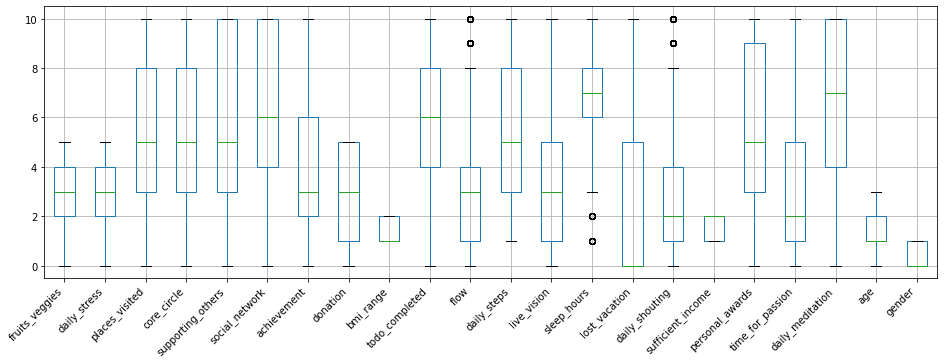

In [23]:
# Boxplots

fig, axes = plt.subplots(figsize=(16,5))

data.boxplot()

for tick in axes.get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right') #Horizontal alignment

plt.show()

In [24]:
n_outliers = data['daily_shouting'][data['daily_shouting']>8].shape[0]
p = n_outliers/data.shape[0]
print("{} values above 1.5·range from Q3 = 8h of daily shouting \n{}% of data".format(n_outliers, round(p*100,2)))

753 values above 1.5·range from Q3 = 8h of daily shouting 
5.9% of data


In [25]:
n_outliers = data['flow'][data['flow']>8].shape[0]
p = n_outliers/data.shape[0]
print("{} values above 1.5·range from Q3 = 8h of daily flow \n{}% of data".format(n_outliers, round(p*100,2)))

374 values above 1.5·range from Q3 = 8h of daily flow 
2.93% of data


In [26]:
n_outliers = data['sleep_hours'][data['sleep_hours']<3].shape[0]
p = n_outliers/data.shape[0]
print("{} values below 1.5·range from Q1 = 3h of daily sleep \n{}% of data".format(n_outliers, round(p*100,2)))

32 values below 1.5·range from Q1 = 3h of daily sleep 
0.25% of data


We decide to keep outliers as they might be meaningfull, representing the reality of population. Besides, they are not excessive to make us think of them as errors

#### Histograms

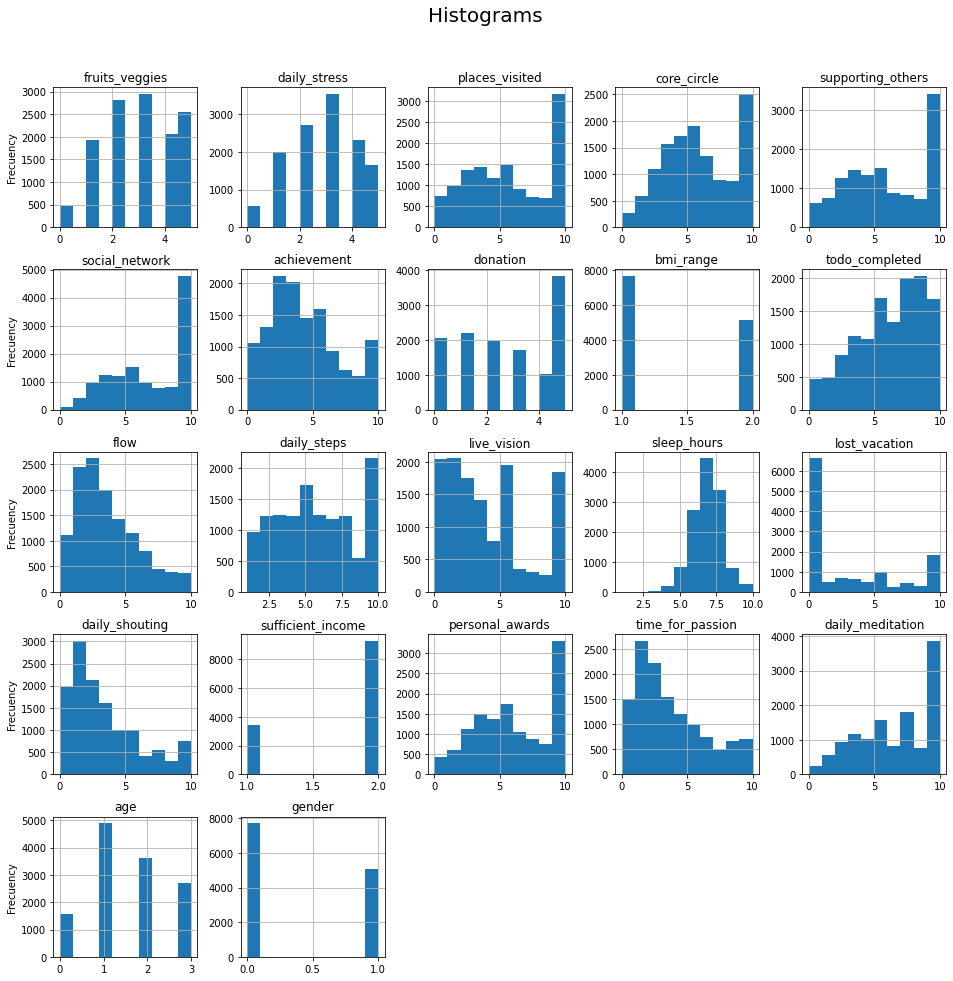

In [27]:
# Histograms numerical variables

axs = data.hist(figsize=(16, 16))

for ax in axs.flatten():
    if ax.is_first_col():
        ax.set_ylabel('Frecuency')
        
plt.suptitle('Histograms', y=0.95, fontsize=20)
plt.show()

### 2.5 Correlations between variables

In [28]:
data.corr()

,fruits_veggies,daily_stress,places_visited,core_circle,supporting_others,social_network,achievement,donation,bmi_range,todo_completed,...,live_vision,sleep_hours,lost_vacation,daily_shouting,sufficient_income,personal_awards,time_for_passion,daily_meditation,age,gender
fruits_veggies,1.000000,-0.095132,0.248520,0.153606,0.207907,0.105804,0.166643,0.200787,-0.091937,0.230350,...,0.113970,0.105838,-0.069845,-0.071099,0.151236,0.165587,0.171531,0.195067,0.183554,-0.118868
daily_stress,-0.095132,1.000000,-0.131707,-0.115973,-0.035373,0.012720,-0.120786,-0.038291,0.084938,-0.166975,...,-0.135016,-0.152862,0.192353,0.309264,-0.144872,-0.044362,-0.161858,-0.213672,-0.020649,-0.128677
places_visited,0.248520,-0.131707,1.000000,0.259982,0.255008,0.157615,0.264964,0.212655,-0.103696,0.234049,...,0.149852,0.129648,-0.124751,-0.089066,0.173262,0.279604,0.198304,0.203315,0.003419,-0.054253
core_circle,0.153606,-0.115973,0.259982,1.000000,0.338630,0.304941,0.292359,0.220173,-0.025774,0.222466,...,0.216494,0.060685,-0.083369,-0.076232,0.122687,0.250223,0.227560,0.103687,0.002869,-0.096980
supporting_others,0.207907,-0.035373,0.255008,0.338630,1.000000,0.311285,0.359009,0.394205,0.027601,0.252200,...,0.233593,0.013629,-0.026155,-0.064187,0.115812,0.333632,0.322820,0.149154,0.190202,-0.131287
social_network,0.105804,0.012720,0.157615,0.304941,0.311285,1.000000,0.252225,0.147615,0.017123,0.212253,...,0.184818,-0.029174,0.011538,-0.010305,0.132226,0.214703,0.202677,-0.006766,-0.058707,-0.050410
achievement,0.166643,-0.120786,0.264964,0.292359,0.359009,0.252225,1.000000,0.236727,-0.034303,0.309286,...,0.316496,0.054920,-0.010751,-0.066264,0.117023,0.400330,0.373957,0.172801,0.002239,-0.006039
donation,0.200787,-0.038291,0.212655,0.220173,0.394205,0.147615,0.236727,1.000000,0.059614,0.189849,...,0.158218,0.005471,-0.025449,-0.054656,0.123999,0.274397,0.188767,0.150520,0.233210,-0.129959
bmi_range,-0.091937,0.084938,-0.103696,-0.025774,0.027601,0.017123,-0.034303,0.059614,1.000000,-0.067473,...,-0.009084,-0.095543,0.032417,0.054456,-0.014296,0.016309,-0.023930,-0.070900,0.200395,-0.009803
todo_completed,0.230350,-0.166975,0.234049,0.222466,0.252200,0.212253,0.309286,0.189849,-0.067473,1.000000,...,0.271881,0.117985,-0.080262,-0.145587,0.203476,0.249857,0.278042,0.181956,0.096548,-0.089833


<AxesSubplot:>

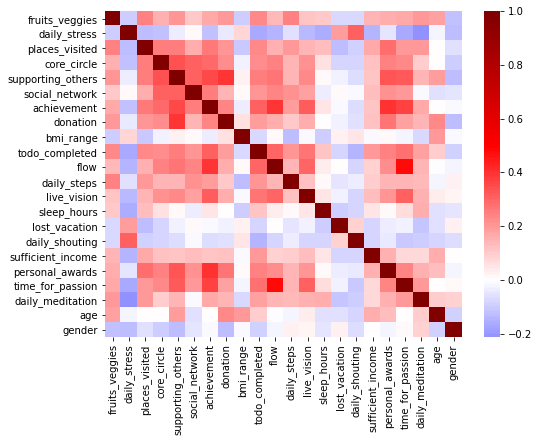

In [29]:
# Heatmap correlations

fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(data.corr(), xticklabels=True, yticklabels=True, ax=ax, center=0, cmap='seismic') #see "diverging colormaps"

**Negative correlations:** 

* ***daily stress*** is the variable with a greater number of negative correlations with other variables (as the others describe in general desireable characteristics for a good life), especially with daily meditation, as we might expect, but also with to-do completed, time for passion and sleep hours. The only one with a positive correlation with daily stress is daily shouting. There might be a real influence of these variables in the level of stress people experience. For a predictive model, daily shouting and daily meditation could be good predictive variables.

**Poor correlations** 

* Variables like *bmi_range, sleep hours, lost vacation* and *daily shouting* seems to be poorly correlated with the others, or slightly negative. For example, pairs like *bmi range* and *daily steps*, *daily shouting* and *to-do completed*, *lost vacation* and *places visited* are slightly negative as we might expect.

**Positive correlations:** 

* The rest of the variables are in general positively correlated with the others and these positive correlation are the strongest ones. From numerical analysis I saw ***achievement*** and *supporting others* are the variables positively correlated with the the greatest number of the others. In particular, achievement is the variable that are positively correlated with a greater number of other variables. For a predictive model, we found that flow and personal awards could be good predictive variables, as they are not too correlated between them. We could try only with these two, but we can include core circle and social network in case we want more than two. However, it would probably increase model complexity unnecessarily and therefore overfitting.  

    Other not surprising strong correlations like:  
    
    * *time for passion* with *flow*   
    * *supporting others* with *donation*  
    * *achievemnt* with *flow* and *personal awards*

In [30]:
sorted_corr = np.unique(np.sort(data.corr().values.flatten()))[::-1] #Correlations in descendent order
array2D_corr = np.array(data.corr())

n = 12
nth_highest = sorted_corr[:n]

In [31]:
nth_highest

array([1.        , 0.48263733, 0.40032959, 0.39420465, 0.38972744,
       0.37395656, 0.35900949, 0.33862994, 0.33363161, 0.32281997,
       0.3164962 , 0.31128491])

In [32]:
for col in data.corr().columns:
    df_pos_corr = pd.DataFrame(data.corr()[col].nlargest(2)[1:]).transpose()
    df_neg_corr = pd.DataFrame(data.corr()[col].nsmallest(1)).transpose()
    df = pd.concat([df_pos_corr, df_neg_corr], axis=1)
    display(df)

,places_visited,gender
fruits_veggies,0.24852,-0.118868


,daily_shouting,daily_meditation
daily_stress,0.309264,-0.213672


,personal_awards,daily_stress
places_visited,0.279604,-0.131707


,supporting_others,daily_stress
core_circle,0.33863,-0.115973


,donation,gender
supporting_others,0.394205,-0.131287


,supporting_others,age
social_network,0.311285,-0.058707


,personal_awards,daily_stress
achievement,0.40033,-0.120786


,supporting_others,gender
donation,0.394205,-0.129959


,age,daily_steps
bmi_range,0.200395,-0.128937


,achievement,daily_stress
todo_completed,0.309286,-0.166975


,time_for_passion,daily_stress
flow,0.482637,-0.142187


,fruits_veggies,bmi_range
daily_steps,0.243607,-0.128937


,achievement,daily_stress
live_vision,0.316496,-0.135016


,daily_meditation,daily_stress
sleep_hours,0.164169,-0.152862


,daily_stress,places_visited
lost_vacation,0.192353,-0.124751


,daily_stress,todo_completed
daily_shouting,0.309264,-0.145587


,todo_completed,daily_stress
sufficient_income,0.203476,-0.144872


,achievement,daily_stress
personal_awards,0.40033,-0.044362


,flow,daily_stress
time_for_passion,0.482637,-0.161858


,places_visited,daily_stress
daily_meditation,0.203315,-0.213672


,donation,gender
age,0.23321,-0.089236


,daily_meditation,supporting_others
gender,0.09405,-0.131287


**Positive correlations:**  


The strongest correlations are positive. Let's see what are the pairs of variables with the highest correlation

Highest correlations:


fruits_veggies - fruits_veggies:
1.0 

flow - time_for_passion:
0.4826373253512499 

achievement - personal_awards:
0.40032959107956373 

supporting_others - donation:
0.39420465220667267 

achievement - flow:
0.38972743712470126 

achievement - time_for_passion:
0.37395655829229923 

supporting_others - achievement:
0.35900949207041805 

core_circle - supporting_others:
0.33862994082240555 

supporting_others - personal_awards:
0.33363160903780187 

supporting_others - time_for_passion:
0.32281997227051246 

achievement - live_vision:
0.31649619770451914 

supporting_others - social_network:
0.3112849098938094 

live_vision - time_for_passion:
0.31101500793287484 

achievement - todo_completed:
0.30928570200317784 

daily_stress - daily_shouting:
0.30926429602231414 

core_circle - social_network:
0.3049413472087288 

todo_completed - flow:
0.30214098153931707 

flow - live_vision:
0.30004494164840867 

core_circle - achievement:
0.29235878020232786 

places_vi

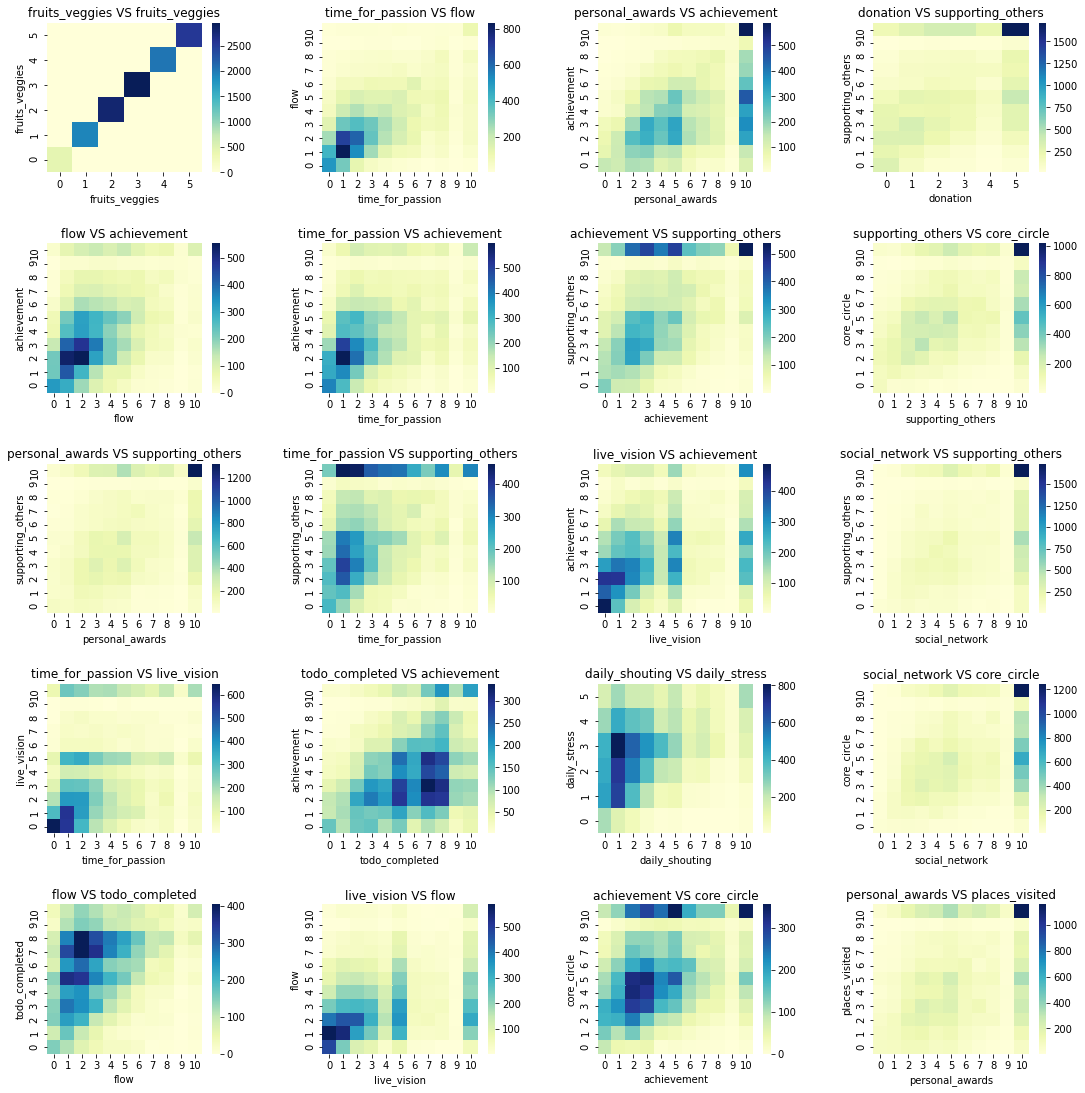

In [33]:
# 12 Pairs of variables with the highest correlation

sorted_corr = np.unique(np.sort(data.corr().values.flatten()))[::-1] #Correlations in descendent order
array2D_corr = np.array(data.corr())

n = 20
nth_highest = sorted_corr[:n]

fig, axs = plt.subplots(5,4, figsize=(16,16))
fig.tight_layout(pad=5) #padding among subplots

axs = axs.flatten()
rows = []
columns = []
print("Highest correlations:\n\n")
for i in range(n):
    position = np.where(array2D_corr == nth_highest[i]) 
    row = data.corr().index[position[0][0]]
    column = data.corr().columns[position[1][0]]
    rows.append(row)
    columns.append(column)
    print("{} - {}:".format(row, column))
    print(nth_highest[i], "\n")
    frecuency = pd.crosstab(data[row],data[column]).iloc[::-1]
    ax = fig.sca(axs[i])
    ax.set(title='{} VS {}'.format(column,row))
    sns.heatmap(frecuency, ax=ax, cmap="YlGnBu")
    
    # axs[i].imshow(frecuency, cmap='Blues')
    # axs[i].hist2d(data[row],data[column], cmap='Blues')

In [34]:
# Number of the other variables that each one is highly correlated with

rows_cols = rows + columns
for variable in list(set(rows_cols)):
    print(variable, rows_cols.count(variable))

supporting_others 6
daily_shouting 1
achievement 7
todo_completed 2
places_visited 1
live_vision 3
time_for_passion 4
social_network 2
core_circle 3
flow 4
fruits_veggies 2
personal_awards 3
donation 1
daily_stress 1


*achievement* and *supporting others* are the variables positively correlated with the the greatest number of the other.  

#### Variable '*Achivement*':

Let's see the correlations of *achievement* with the others, and what pairs of these are less correlated between them:

In [35]:
# Correlations with achievement
data.corr()['achievement'].sort_values()

daily_stress        -0.120786
daily_shouting      -0.066264
bmi_range           -0.034303
lost_vacation       -0.010751
gender              -0.006039
age                  0.002239
sleep_hours          0.054920
sufficient_income    0.117023
fruits_veggies       0.166643
daily_meditation     0.172801
daily_steps          0.193328
donation             0.236727
social_network       0.252225
places_visited       0.264964
core_circle          0.292359
todo_completed       0.309286
live_vision          0.316496
supporting_others    0.359009
time_for_passion     0.373957
flow                 0.389727
personal_awards      0.400330
achievement          1.000000
Name: achievement, dtype: float64

In [36]:
# What pair of them are less correlated between them?
achievement_corrs = data.corr()['achievement'].sort_values().index.tolist()
data.corr()[achievement_corrs].loc[achievement_corrs]

,daily_stress,daily_shouting,bmi_range,lost_vacation,gender,age,sleep_hours,sufficient_income,fruits_veggies,daily_meditation,...,social_network,places_visited,core_circle,todo_completed,live_vision,supporting_others,time_for_passion,flow,personal_awards,achievement
daily_stress,1.000000,0.309264,0.084938,0.192353,-0.128677,-0.020649,-0.152862,-0.144872,-0.095132,-0.213672,...,0.012720,-0.131707,-0.115973,-0.166975,-0.135016,-0.035373,-0.161858,-0.142187,-0.044362,-0.120786
daily_shouting,0.309264,1.000000,0.054456,0.085184,-0.064035,-0.084847,-0.078230,-0.076268,-0.071099,-0.096076,...,-0.010305,-0.089066,-0.076232,-0.145587,-0.081179,-0.064187,-0.104970,-0.080099,-0.041729,-0.066264
bmi_range,0.084938,0.054456,1.000000,0.032417,-0.009803,0.200395,-0.095543,-0.014296,-0.091937,-0.070900,...,0.017123,-0.103696,-0.025774,-0.067473,-0.009084,0.027601,-0.023930,0.011586,0.016309,-0.034303
lost_vacation,0.192353,0.085184,0.032417,1.000000,0.025472,-0.052863,-0.093058,-0.083065,-0.069845,-0.113086,...,0.011538,-0.124751,-0.083369,-0.080262,-0.028527,-0.026155,-0.026963,0.000539,-0.038252,-0.010751
gender,-0.128677,-0.064035,-0.009803,0.025472,1.000000,-0.089236,-0.048616,0.006567,-0.118868,0.094050,...,-0.050410,-0.054253,-0.096980,-0.089833,0.022373,-0.131287,0.015833,-0.016699,-0.020684,-0.006039
age,-0.020649,-0.084847,0.200395,-0.052863,-0.089236,1.000000,-0.056300,0.161993,0.183554,0.099682,...,-0.058707,0.003419,0.002869,0.096548,0.041089,0.190202,0.000118,-0.002399,0.130737,0.002239
sleep_hours,-0.152862,-0.078230,-0.095543,-0.093058,-0.048616,-0.056300,1.000000,0.047208,0.105838,0.164169,...,-0.029174,0.129648,0.060685,0.117985,0.047949,0.013629,0.067811,0.036995,0.018537,0.054920
sufficient_income,-0.144872,-0.076268,-0.014296,-0.083065,0.006567,0.161993,0.047208,1.000000,0.151236,0.071580,...,0.132226,0.173262,0.122687,0.203476,0.130777,0.115812,0.079585,0.086671,0.153977,0.117023
fruits_veggies,-0.095132,-0.071099,-0.091937,-0.069845,-0.118868,0.183554,0.105838,0.151236,1.000000,0.195067,...,0.105804,0.248520,0.153606,0.230350,0.113970,0.207907,0.171531,0.136223,0.165587,0.166643
daily_meditation,-0.213672,-0.096076,-0.070900,-0.113086,0.094050,0.099682,0.164169,0.071580,0.195067,1.000000,...,-0.006766,0.203315,0.103687,0.181956,0.152180,0.149154,0.196000,0.145943,0.154547,0.172801


In [37]:
# The lowest values of correlation in absolute value
np.unique(np.sort(np.array(abs(data.corr()[achievement_corrs[11:]].loc[achievement_corrs[11:]])).flatten()))

array([0.14761525, 0.14985247, 0.15491703, 0.15761513, 0.15821833,
       0.16224798, 0.18481764, 0.18876745, 0.18984902, 0.19830437,
       0.20267701, 0.20659311, 0.21225279, 0.21265549, 0.21470312,
       0.21649415, 0.21797815, 0.22017343, 0.22246642, 0.22756044,
       0.23359329, 0.23404912, 0.23672727, 0.23980767, 0.24004297,
       0.24329982, 0.2498565 , 0.25022277, 0.25219994, 0.25222473,
       0.25500816, 0.25998208, 0.26496444, 0.26688059, 0.271881  ,
       0.27439719, 0.27804196, 0.27960372, 0.29235878, 0.30004494,
       0.30214098, 0.30494135, 0.3092857 , 0.31101501, 0.31128491,
       0.3164962 , 0.32281997, 0.33363161, 0.33862994, 0.35900949,
       0.37395656, 0.38972744, 0.39420465, 0.40032959, 0.48263733,
       1.        ])

The more down and right, the most correlation the variables are with achievement. For a prediction model, we are interested in predictive variables with a low correlation between them, so we should look for small values in the down-right part of this dataframe. We see a 0.217978 corresponding to *flow* and *personal awards*, so it might be a good option chosing only these two. *core circle* and *social network* would be the next ones to chose in case we want more.

**Negative correlations:**

Let's see de most negative correlated variables with the others:

Lowest correlations:


daily_stress - daily_meditation:
-0.21367242460175634 

daily_stress - todo_completed:
-0.16697526420745487 

daily_stress - time_for_passion:
-0.1618577321177887 

daily_stress - sleep_hours:
-0.15286158450655735 

todo_completed - daily_shouting:
-0.14558711896131799 

daily_stress - sufficient_income:
-0.14487168163684583 

daily_stress - flow:
-0.142187370687171 

daily_stress - live_vision:
-0.1350155981795351 

daily_stress - places_visited:
-0.13170694011317127 

supporting_others - gender:
-0.13128712907783338 

donation - gender:
-0.12995859803876536 

bmi_range - daily_steps:
-0.1289368441372705 

daily_stress - gender:
-0.128676852685506 

places_visited - lost_vacation:
-0.12475119803990595 

daily_stress - achievement:
-0.12078578179755883 

fruits_veggies - gender:
-0.11886752387580067 

daily_stress - core_circle:
-0.11597261409797491 

lost_vacation - daily_meditation:
-0.11308591354343855 

daily_shouting - time_for_passion:
-0.10497038387085024 

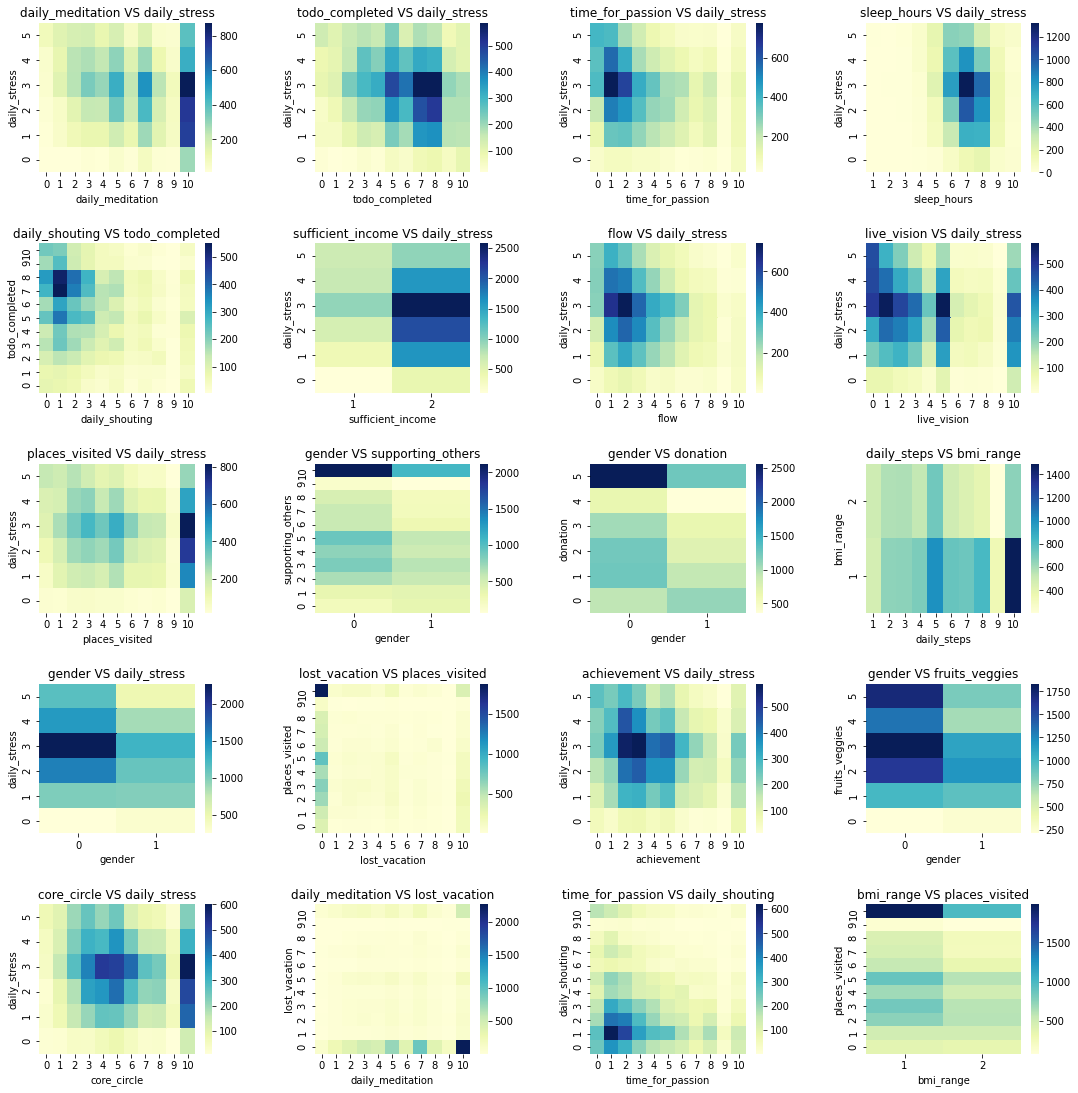

In [38]:
# 12 Pairs of variables with the most negative correlation

sorted_corr = np.unique(np.sort(data.corr().values.flatten()))
array2D_corr = np.array(data.corr())

n = 20
nth_lowest = sorted_corr[:n]

fig, axs = plt.subplots(5,4, figsize=(16,16))
fig.tight_layout(pad=5) #padding between subplots

axs = axs.flatten()
rows = []
columns = []
print("Lowest correlations:\n\n")
for i in range(n):
    position = np.where(array2D_corr == nth_lowest[i]) 
    row = data.corr().index[position[0][0]]
    column = data.corr().columns[position[1][0]]
    rows.append(row)
    columns.append(column)
    print("{} - {}:".format(row, column))
    print(nth_lowest[i], "\n")
    frecuency = pd.crosstab(data[row],data[column]).iloc[::-1]
    ax = fig.sca(axs[i])
    ax.set(title='{} VS {}'.format(column,row))
    sns.heatmap(frecuency, ax=ax, cmap="YlGnBu")
    
    # axs[i].imshow(frecuency, cmap='Blues')
    # axs[i].hist2d(data[row],data[column], cmap='Blues')

In [39]:
# Number of the other variables that each one is highly negative correlated with

rows_cols = rows + columns
for variable in list(set(rows_cols)):
    print(variable, rows_cols.count(variable))

supporting_others 1
daily_shouting 2
todo_completed 2
sleep_hours 1
achievement 1
places_visited 3
time_for_passion 2
fruits_veggies 1
lost_vacation 2
bmi_range 2
daily_stress 11
daily_meditation 2
gender 4
live_vision 1
donation 1
sufficient_income 1
flow 1
core_circle 1
daily_steps 1


#### Variable *'daily stress'*

As we showed above in the heatmap of the correlations matrix, ***daily stress*** is negatively correlated with a number of other variables. Let's see the most negative correlations of *daily stress* with the others, and what pairs of these others are less correlated between them:

In [40]:
# Correlations with daily stress
data.corr()['daily_stress'].sort_values()

daily_meditation    -0.213672
todo_completed      -0.166975
time_for_passion    -0.161858
sleep_hours         -0.152862
sufficient_income   -0.144872
flow                -0.142187
live_vision         -0.135016
places_visited      -0.131707
gender              -0.128677
achievement         -0.120786
core_circle         -0.115973
fruits_veggies      -0.095132
daily_steps         -0.057925
personal_awards     -0.044362
donation            -0.038291
supporting_others   -0.035373
age                 -0.020649
social_network       0.012720
bmi_range            0.084938
lost_vacation        0.192353
daily_shouting       0.309264
daily_stress         1.000000
Name: daily_stress, dtype: float64

In [41]:
# What pair of them are less correlated between them?
stress_corrs = abs(data.corr()['daily_stress']).sort_values().index.tolist()
data.corr()[stress_corrs[11:]].loc[stress_corrs[11:]]

,places_visited,live_vision,flow,sufficient_income,sleep_hours,time_for_passion,todo_completed,lost_vacation,daily_meditation,daily_shouting,daily_stress
places_visited,1.000000,0.149852,0.154917,0.173262,0.129648,0.198304,0.234049,-0.124751,0.203315,-0.089066,-0.131707
live_vision,0.149852,1.000000,0.300045,0.130777,0.047949,0.311015,0.271881,-0.028527,0.152180,-0.081179,-0.135016
flow,0.154917,0.300045,1.000000,0.086671,0.036995,0.482637,0.302141,0.000539,0.145943,-0.080099,-0.142187
sufficient_income,0.173262,0.130777,0.086671,1.000000,0.047208,0.079585,0.203476,-0.083065,0.071580,-0.076268,-0.144872
sleep_hours,0.129648,0.047949,0.036995,0.047208,1.000000,0.067811,0.117985,-0.093058,0.164169,-0.078230,-0.152862
time_for_passion,0.198304,0.311015,0.482637,0.079585,0.067811,1.000000,0.278042,-0.026963,0.196000,-0.104970,-0.161858
todo_completed,0.234049,0.271881,0.302141,0.203476,0.117985,0.278042,1.000000,-0.080262,0.181956,-0.145587,-0.166975
lost_vacation,-0.124751,-0.028527,0.000539,-0.083065,-0.093058,-0.026963,-0.080262,1.000000,-0.113086,0.085184,0.192353
daily_meditation,0.203315,0.152180,0.145943,0.071580,0.164169,0.196000,0.181956,-0.113086,1.000000,-0.096076,-0.213672
daily_shouting,-0.089066,-0.081179,-0.080099,-0.076268,-0.078230,-0.104970,-0.145587,0.085184,-0.096076,1.000000,0.309264


In [42]:
# The lowest values of correlation in absolute value
np.unique(np.sort(np.array(abs(data.corr()[stress_corrs[11:]].loc[stress_corrs[11:]])).flatten()))

array([5.39244520e-04, 2.69626501e-02, 2.85272804e-02, 3.69947788e-02,
       4.72083003e-02, 4.79493603e-02, 6.78111005e-02, 7.15803146e-02,
       7.62676096e-02, 7.82295707e-02, 7.95853327e-02, 8.00993712e-02,
       8.02622588e-02, 8.11793283e-02, 8.30652481e-02, 8.51840221e-02,
       8.66714470e-02, 8.90661821e-02, 9.30579567e-02, 9.60761312e-02,
       1.04970384e-01, 1.13085914e-01, 1.17985233e-01, 1.24751198e-01,
       1.29647517e-01, 1.30777052e-01, 1.31706940e-01, 1.35015598e-01,
       1.42187371e-01, 1.44871682e-01, 1.45587119e-01, 1.45942796e-01,
       1.49852474e-01, 1.52180100e-01, 1.52861585e-01, 1.54917034e-01,
       1.61857732e-01, 1.64169500e-01, 1.66975264e-01, 1.73262396e-01,
       1.81955930e-01, 1.92352962e-01, 1.96000331e-01, 1.98304373e-01,
       2.03315316e-01, 2.03476252e-01, 2.13672425e-01, 2.34049116e-01,
       2.71880996e-01, 2.78041959e-01, 3.00044942e-01, 3.02140982e-01,
       3.09264296e-01, 3.11015008e-01, 4.82637325e-01, 1.00000000e+00])

The more down and right, the most correlation the variables are with *daily stress*. For a prediction model, we are interested in predictive variables with a low correlation (in absolute value) between them, so we should look for small values in the down-right part of this dataframe. We see a -0.096076 corresponding to *daily shouting* and *daily meditation*, so it might be a good option chosing these two. Other ones we can chose that are poorly correlated with *daily shouting* and *daily meditation* are *lost vacation* and *sufficient income*. 

### 2.6 Summary of the EDA: Key Findings and insights  

From the EDA we can conclude some key findings:

* About distribution of data, we see that variables are not normally distributed. Most of them are left-skewed, in particular those related to social area: *core circle, social network, supporting others or donation*. This means that there are a few people with a poor social life compared with the mayority's. On the other hand, other variables are right-skewed, so for example there are a few people standing out in *time for passion, flow and achievement* from the rest.



* There is a clear division between variables positively (red) and negatively (blue) correlated with the others in general. *achievement* and *daily stress* are the ones with a greater potencial to be predicted, as the have the strongest positive and negative correlations respectively.  


* ***achievement*** is the variable that are positively correlated with a greater number of other variables. For a predictive model, we found that *flow* and *personal awards* could be good predictive variables, as they are not too correlated between them. We could try only with these two, but we can include *core circle* and *social network* in case we want more than two. However, it would probably increase model complexity unnecessarily and therefore overfitting.



* ***daily stress*** are the one with a greater number of negative correlations with other variables, such as daily meditation, to-do completed, time for passion or sleep hours. There might be a real influence of these variables in the level of stress people experience. For a predictive model, *daily shouting* and *daily meditation* could be good predictive variables. Other good options to include are *Lost vacation*, although it doesn't seem to have much a real relationship with stress, and *sufficient income*.

## 3. Hypothesis  

**Hypothsis 1:** *Population sleep less than 7 hours (World Health Organization recommendation is 7-8 hours)*. We can perform a t-test and check out if people sleep in average fewer hours than the OMS recommends, which might be indicative for a poor quality of life.The next step would be to see if those who sleep few hours also have negative indicators as a high levels of stress or low marks in achivement, personal awards, etc.



**Hypothesis 2:** *Data points with high values for positive attributes are grouped together*. It is said than one good habit positively affects in other areas, producing a kind of "virtuous cycle". Because of this and the similar behaviours of positive attributes (reds in the correlation matrix) we saw with the other variables, we might expect data to be grouped by positive and negative attributes. We could perform clusttering or classification algorithms along with a significance test of the results to check out this hypothesis.



**Hypothesis 3:** *There is a correlation between *achievement* and the variables *flow*, *daily_meditation* and *time for passion* significantly different from zero.* If so, we can try a predictive model like a linear model to predict achievement or just use the findings for interpretation and increase of our achievements.   




**Hypothsis 4:** *There is a correlation between *daily stress* and *daily meditation* significantly different from zero.* The same as the hypothesis 2 can be performed with *daily stress*.

### Significance test for the hypothsis 1: Population sleep less than 7 hours

We assume that the sleep hours follow a normal distribution and we are going to process the variable as continuous, although our data only takes integers between 1 and 10. Our null ($H_{0}$) and alternative ($H_{1}$) hypothesis are:

$H_{0}: \mu < 7h$  
$H_{1}: \mu \geq 7h$

The population standard deviation is unknown, so we are going to estimate it from our data and perform a t test:

**1.** We calculate the t statistic:  

$t_0 = \large \frac{\overline{X} - \mu}{\Large \frac{S} {\sqrt n}} \hspace{0.5cm} \small [1]$

where,  

$S = \large \sqrt{\frac{\sum_{i=1}^n (x_{i}-\overline x)^2}{n-1}}$  

is the standar deviation of our sample, and 

$\mu$: population mean  
$\overline X$: sample mean


*****


**2.** The p-value is the probability of $t$ to be greater than what we got from our sample, $t_0$. This is the area down the curve of the T-Student distribution, whose expression is:  

$f(t) = \large \frac{\Gamma(\frac{\Large \nu + 1}{2})}{\sqrt{\nu\pi}\hspace{1mm} \Gamma(\nu/2)} (1+\frac{t^2}{\nu})^{-\frac{\nu+1}{2}} \hspace{0.5cm} \small [2]$,  

where   

$\hspace{2cm}\Gamma(p) = \int_0^\infty x^{p-1}e^{-x}dx \hspace{0.5cm} \small [3]$ 
        
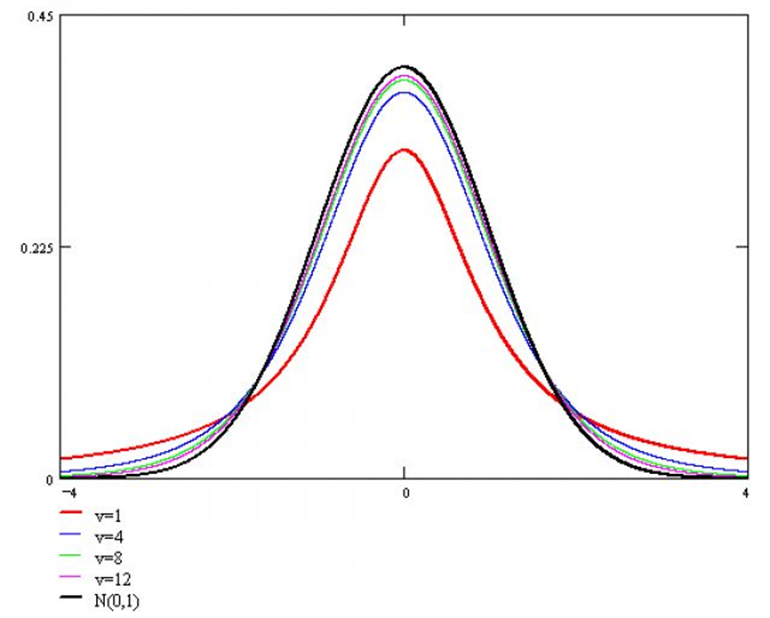

The area down the curve is the integral of $f(t)$ between 2 t's. When integrating between $t_0$ and $\infty$ we get the p-value, which is the probability of t > $t_0$, and therefore, the probability of the mean from another sample to be greater than our $\overline X$.   


*What is the probability of the population mean to be less than 7h, giving our sample?*  
See in [0] that for the variable t, keeping $\mu$ fixed and varying $\overline X$ is equivalent to keeping a $\overline X$ and varying $\mu$. To calculate the probability of the population mean to be less than 7h giving our sample, we would have our $\overline X$ fixed (from our sample) and we would traverse (recorreríamos) $\mu$ from $7 \rightarrow -\infty$ (to 0 actually), which is the same as keeping $\mu = 7$ and traverse $\overline X$ from $7.03 \rightarrow \infty$. When integrating $f(t)$ we would traverse t in opposite directions, but we can see in [0] that also $dt$ has opposite sign, so the integral result would be the same.  

Thus, *the probability of population mean to be less than 7h giving our sample, is exactly the same as the probability of any sample mean to be greater than ours (7.03h) assuming the hypothesis that the population mean is 7h, i.e.,  giving $\mu = 7$*

In [43]:
from scipy.stats import t

mu = 7 # Population mean if the hypothesis is true
sample_mean = data['sleep_hours'].mean()
sample_std = data['sleep_hours'].std()
n = data['sleep_hours'].shape[0]

t_stat = (sample_mean - mu) / (sample_std/np.sqrt(n))
t_stat

3.3069605551230157

In [44]:
# Probability of mu < 7h

p_value = 1-t.cdf(t_stat, df=n-1)
print("p-value: ", p_value)
print("1-p-pavlue: ", 1-p_value)

p-value:  0.0004728744186621725
1-p-pavlue:  0.9995271255813378


My confidence level was 99%, so p-values below 0.01 would lead us to reject the null hypothesis. I obtained a $p-value \approx 0.0005$. *We can reject the null hypothesis with (at least) a 99% of confidence*  

***$H_{1}$ accepted: Population sleep in average 7h or more***


--------

**Extra: Bayesian interpretation**  

NOTE: I think expressions below are not valid for continuous variables, so this can be all wrong

Define:

$r = \large \frac{p(H_{0}|x)}{p(H_{1}|x)} = \frac{p(H_{0})·p(x|H_{0})}{p(H_{1})·p(x|H_{1})} = \frac{p(H_{0})}{p(H_{1})}·\frac{p_{value}}{1 - p_{value}}$,   

In [45]:
# Giving the same prior probabilities to both hypothesis, p(H0) = p(H1):

r = p_value/(1-p_value)
r

0.00047309813466757356

In [46]:
1/r

2113.726363987164

The alternative hypothesis is 2114 times more likely than the null hypothesis. The sum of both probabilities is 1, so:

In [47]:
p_H1 = (1/r) / ((1/r)+1)
p_H1

0.9995271255813378

Posterior probability: $p(H_{1}) = 99.95 \% $

**Which is the value of the population mean?**

In [48]:
mu = 7.03
t_stat = (sample_mean - mu) / (sample_std/np.sqrt(n))
t_stat

0.48867891499420146

In [49]:
t.cdf(t_stat, df=n-1)

0.6874612820197958

$\mu = \overline{X} \pm \large t·\frac{S}{\sqrt{n}}$

In [50]:
t.ppf(0.95, df=n-1) * sample_std/math.sqrt(n)

0.01751038383904761

**The mean is $(7.03 \pm 0.02)h$ with a confidence level of 95%**

## 4. Next steps

The steps may be:  

* Create a linear model for stress level with *daily meditation* and *daily shouting* as predictive variables, and see if they really have a correlation significantly different from zero. We can try a log transformation in case we don't get normally distributed residuals, as the variable *daily shouting* is right-skewed and this can lead to skewed residuals. With *daily mediatation* a polynomial transformation might be required to fix the left skew.


* Create a predictive model for *achievement* with *flow* and *personal awards* as predictive variables, and see if they really have a correlation significantly different from zero. Again, we can try a log transformation with the variable *flow* in case we don't get normally distributed residuals, as it is right-skewed, and we can also try polynomial transformation with *personal awards*. 


* Look for clustters to see the disposition of the data. We could perform clusttering or classification algorithms to prove hypothesis 2. Scaling the variables may be necessary to this issue related with distances.

## 5. About this data set  

This dataset from kaggle has a very good quality, with no NaNs, no blanks and even no outliers, and I found it particularly interesting. It is a large dataset, which allows us making accurate studies that reflect reality. As it is a survey where answers are a score between 0-5 or 0-10, there are not extreme or surprising values.  
  

Maybe I missed a kind of "satisfaction score" to use as a target for predicting people's satisfaction according to their life habits.